## 0 课程大纲

### 0.1 上采样和下采样
```python
cv.pyrUp(img) 
cv.pyrDown(img)
```

### 0.2 Laplacian金字塔

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 8. 金字塔采样

### 8.1 降采样

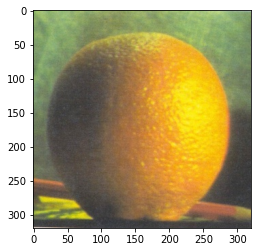

In [7]:
img = cv2.imread('pic/orange.jpg')
show(img)
d = cv2.pyrDown(img)
dd = cv2.pyrDown(d)

$$
\frac{1}{256} \begin{bmatrix} 1 & 4 & 6 & 4 & 1  \\ 4 & 16 & 24 & 16 & 4  \\ 6 & 24 & 36 & 24 & 6  \\ 4 & 16 & 24 & 16 & 4  \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}
$$

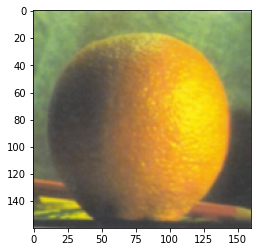

In [8]:
show(d)

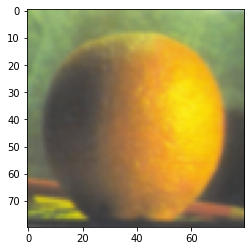

In [9]:
show(dd)

### 8.2 上采样

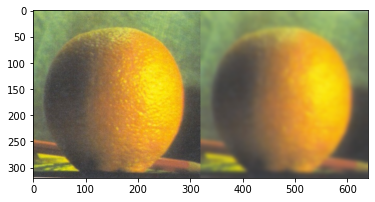

In [12]:
ddu = cv2.pyrUp(dd) #(125x125) ->(250, 250)
dduu = cv2.pyrUp(ddu) #(250,250) ->(500,500)

show(np.hstack([img, dduu]))

In [13]:
cv2.imwrite("pic/orange_pyrup_down.jpg", np.hstack([img, dduu]))

True

$$
4\times\frac{1}{256} \begin{bmatrix} 1 & 4 & 6 & 4 & 1  \\ 4 & 16 & 24 & 16 & 4  \\ 6 & 24 & 36 & 24 & 6  \\ 4 & 16 & 24 & 16 & 4  \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}
$$

### 8.3 Laplacian 金字塔

$$
L_i = S_i - Pyup(S_{i+1})
$$

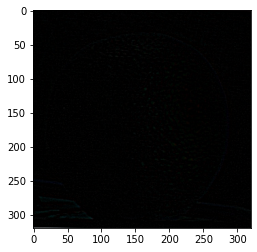

In [35]:
du = cv2.pyrUp(d)
lp0 = cv2.subtract(img, du)

lp0_x20 = cv2.convertScaleAbs(lp0.astype(np.int) * 20)
plt.imshow(lp0)
plt.show()

In [36]:
cv2.imwrite("pic/orange_laplacian_pyr_1.jpg", np.hstack([img, du, lp0, lp0_x20]))

True

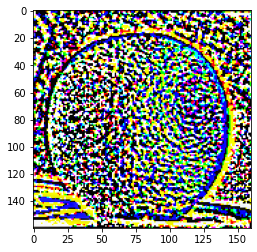

In [34]:
lp1 = d - ddu
show(lp1)

In [37]:
cv2.imwrite("pic/orange_laplacian_pyr_2.jpg", np.hstack([d, ddu, lp1]))

True

### 8.4 图像融合 Orapple

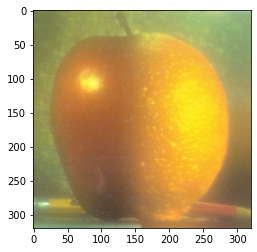

In [46]:
# 参考Opencv官方文档

import cv2
import numpy as np

A = cv2.imread("pic/apple.jpg")
B = cv2.imread("pic/orange.jpg")

# 对A进行高斯金字塔下采样
G = A.copy()
gpA = [G]
for i in range(5):
    G = cv2.pyrDown(G)
    gpA.append(G)
    
# 同样，对B进行高斯金字塔下采样
G = B.copy()
gpB = [G]
for i in range(5):
    G = cv2.pyrDown(G)
    gpB.append(G)
    
# 创建Laplacian金字塔
lpA = [gpA[-1]]
for i in range(5, 0, -1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1], GE)
    lpA.append(L)
    
lpB = [gpB[-1]]
for i in range(5, 0, -1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1], GE)
    lpB.append(L)
    
# lpA中每个元素取左半，lpB中每个元素取右半，拼成一张图
LS = []
for la, lb in zip(lpA, lpB):
    rows, cols, dpt = la.shape
    ls = np.hstack((la[:, :cols//2], lb[:, cols//2:]))
    LS.append(ls)

# show(LS[0])
# 重建
blend = LS[0]
for i in range(1, 6):
    blend = cv2.pyrUp(blend)
    blend = cv2.add(blend, LS[i])
    
show(blend)

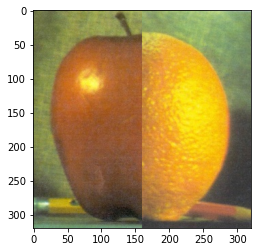

In [40]:
rows, cols, c = A.shape
raw_blend = np.hstack([A[:, :cols//2], B[:, cols//2:]])
show(raw_blend)

In [48]:
cv2.imwrite("pic/orapple.jpg", np.hstack([A, B, raw_blend, blend]))

True

In [95]:
# 用最顶层保存图像基本信息
# 之前用Laplacian差值保存信息

In [3]:
import cv2 as cv
import numpy as np

apple = cv.imread("pic/apple.jpg")
orange = cv.imread("pic/orange.jpg")

apple.shape

(320, 320, 3)

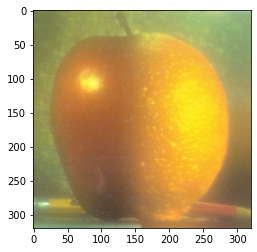

In [16]:
A = [apple]
B = [orange]
LA, LB, L, R = [], [], [], []

n = 5

for i in range(n):
    Ai = cv.pyrDown(A[-1])
    A.append(Ai)
    Bi = cv.pyrDown(B[-1])
    B.append(Bi)
    
for i in range(n):
    LAi = cv.subtract(A[i], cv.pyrUp(A[i+1]))
    LA.append(LAi)
    LBi = cv.subtract(B[i], cv.pyrUp(B[i+1]))
    LB.append(LBi)
LA.append(A[-1])
LB.append(B[-1])
    
for la, lb in zip(LA, LB):
    rows, cols, c = la.shape
    cat = np.hstack([la[:, :cols//2], lb[:, cols//2:]])
    L.append(cat)

blend = L[n]
for i in range(n, 0, -1):
    blend = cv.add(cv.pyrUp(blend), L[i-1])
    
show(blend)